In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from scipy.interpolate import interp1d


%matplotlib widget

## CMDs

In [8]:
# load and clean data
input_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc0104_multi_v1_catalog-meth1.txt'
df = pd.read_csv(input_file, header=None, delim_whitespace=True, 
                   usecols=[0, 1, 2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32], 
                   names=['X','Y','F275W','rad_275','F336W','rad_336','F435W','rad_435','F606W','rad_606','F814W','rad_814','prob_member'], skiprows=55)

df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

In [9]:
# flag the data that are ok (membership probability and radxs)
# set the conditions
conditions = (
    (df['prob_member'] >= 90) & 
    (np.abs(df['rad_275']) < 0.2) &
    (np.abs(df['rad_336']) < 0.2) &
    (np.abs(df['rad_435']) < 0.2) &
    (np.abs(df['rad_606']) < 0.2) &
    (np.abs(df['rad_814']) < 0.2) 
    )   

# assign the flag 
df['flag'] = np.where(conditions, 1, 0)

In [10]:
# select the data with flag 1 
data = df[df['flag'] == 1]

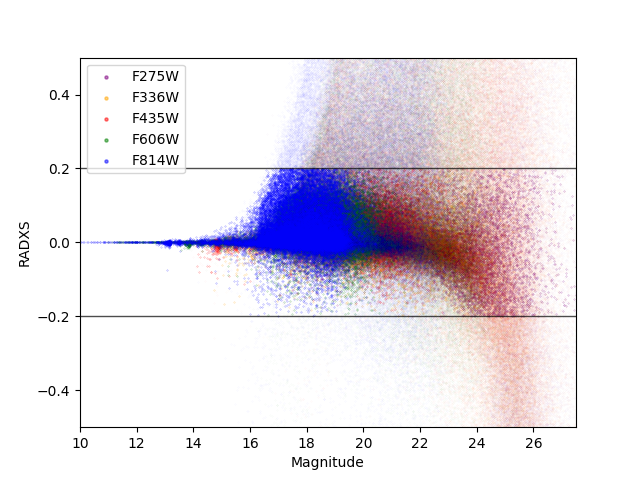

In [11]:
fig = plt.figure()
plt.scatter(df['F275W'], df['rad_275'], s=0.05, c='purple', alpha=0.05)
plt.scatter(data['F275W'], data['rad_275'], s=0.05, c='purple', label='F275W', alpha=0.5)
plt.scatter(df['F336W'], df['rad_336'], s=0.05, c='orange', alpha=0.05)
plt.scatter(data['F336W'], data['rad_336'], s=0.05, c='orange', label='F336W', alpha=0.5)
plt.scatter(df['F435W'], df['rad_435'], s=0.05, c='red', alpha=0.05)
plt.scatter(data['F435W'], data['rad_435'], s=0.05, c='red', label='F435W', alpha=0.5)
plt.scatter(df['F606W'], df['rad_606'], s=0.05, c='green', alpha=0.05)
plt.scatter(data['F606W'], data['rad_606'], s=0.05, c='green', label='F606W', alpha=0.5)
plt.scatter(df['F814W'], df['rad_814'], s=0.05, c='blue', alpha=0.05)
plt.scatter(data['F814W'], data['rad_814'], s=0.05, c='blue', label='F814W', alpha=0.5)

plt.axhline(y=0.2, color='black', linestyle='-', linewidth=1, alpha=0.7)
plt.axhline(y=-0.2, color='black', linestyle='-', linewidth=1, alpha=0.7)

plt.xlim(10.0, 27.5)
plt.ylim(-0.5,0.5)

plt.xlabel('Magnitude')
plt.ylabel('RADXS')
plt.legend(loc='upper left', markerscale=10)
plt.show()

## Create the catalog for the test stars

In [12]:
fid = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/fiducial_606_814.csv')
hb = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/HB_606_814.csv')

In [15]:
mags = [19.5, 19, 18.5, 18, 17.5, 17, 16.75, 16.5, 16.35, 16, 15.5, 15, 14.5, 14, 13.5, 13, 12.5, 12, 11.5, 11, 10.5, 10]
x_val = fid['x']
y_val = fid['y']

# interpolate
interp_func = interp1d(y_val, x_val, kind='linear', fill_value='extrapolate')
colors = interp_func(mags)

mags_2 = colors + mags

In [16]:
new_df = pd.DataFrame({
    'F814W': mags,
    'F606W': mags_2
})

print(new_df)

    F814W      F606W
0   19.50  20.382606
1   19.00  19.757593
2   18.50  19.164762
3   18.00  18.592701
4   17.50  18.053341
5   17.00  17.534917
6   16.75  17.290466
7   16.50  17.068676
8   16.35  16.977174
9   16.00  16.676401
10  15.50  16.200467
11  15.00  15.709941
12  14.50  15.232713
13  14.00  14.753325
14  13.50  14.276600
15  13.00  13.807619
16  12.50  13.363995
17  12.00  12.915212
18  11.50  12.472453
19  11.00  12.053782
20  10.50  11.660402
21  10.00  11.356042


In [17]:
#new_df.to_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/test_stars.csv', index=False, float_format='%.4f')

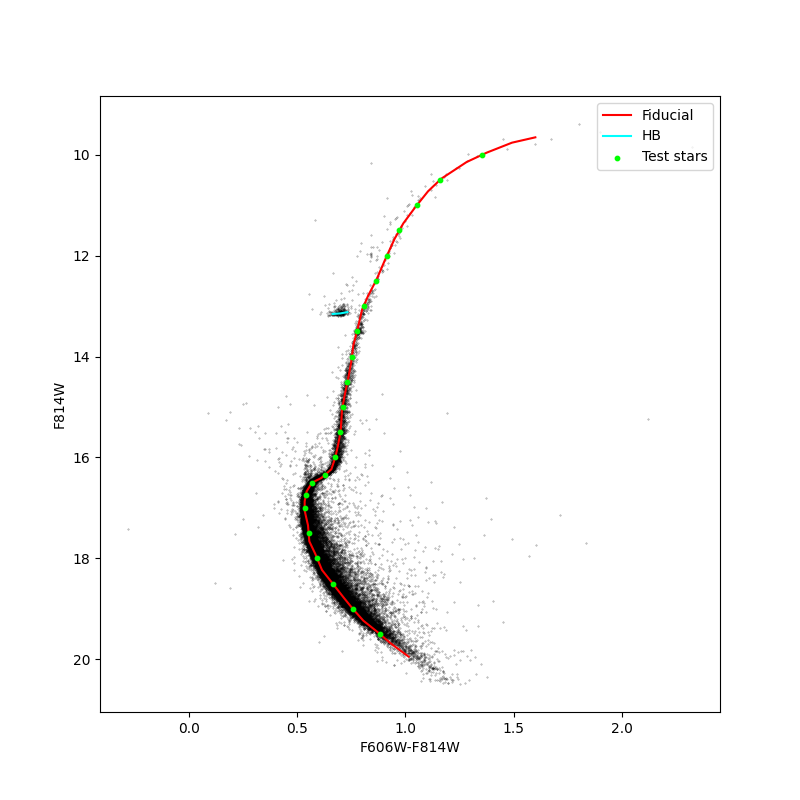

In [18]:
fig = plt.figure(figsize=(8,8))
plt.scatter(data['F606W']-data['F814W'], data['F814W'], 
            s=0.1, alpha=0.5, c='black', zorder=1)
plt.plot(fid['x'], fid['y'], c='red', linewidth=1.5, label='Fiducial', zorder=2)
plt.plot(hb['x'], hb['y'], c='cyan', linewidth=1.5, label='HB', zorder=3)
plt.scatter(new_df['F606W']-new_df['F814W'], new_df['F814W'], 
            s=10, c='lime', label='Test stars', zorder=4)
plt.gca().invert_yaxis()

plt.xlabel('F606W-F814W')
plt.ylabel('F814W')
plt.legend(loc='upper right')

plt.show()

### Visible CMD

In [19]:
fid_606_814 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/fiducial_606_814.csv')
hb_606_814 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/HB_606_814.csv')

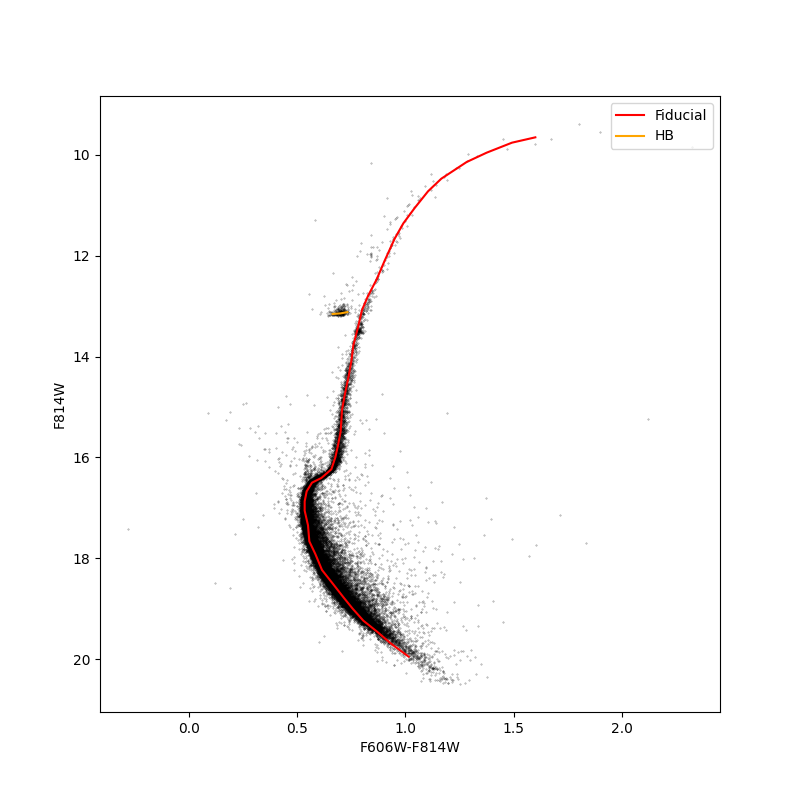

In [20]:
fig = plt.figure(figsize=(8,8))
plt.scatter(data['F606W']-data['F814W'], data['F814W'], 
            s=0.1, alpha=0.5, c='black')
plt.plot(fid_606_814['x'], fid_606_814['y'], c='red', linewidth=1.5, label='Fiducial')
plt.plot(hb_606_814['x'], hb_606_814['y'], c='orange', linewidth=1.5, label='HB')
plt.gca().invert_yaxis()

plt.xlabel('F606W-F814W')
plt.ylabel('F814W')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# load fiducials
fid_606 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/fiducial_606_814.csv')
hb_606 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/HB_606_814.csv')

fid_435 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/fiducial_435_814.csv')
hb_435 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/HB_435_814.csv')

fid_336 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/fiducial_336_814.csv')
hb_336 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/HB_336_814.csv')

fid_275 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/fiducial_275_814.csv')
hb_275 = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/HB_275_814.csv')


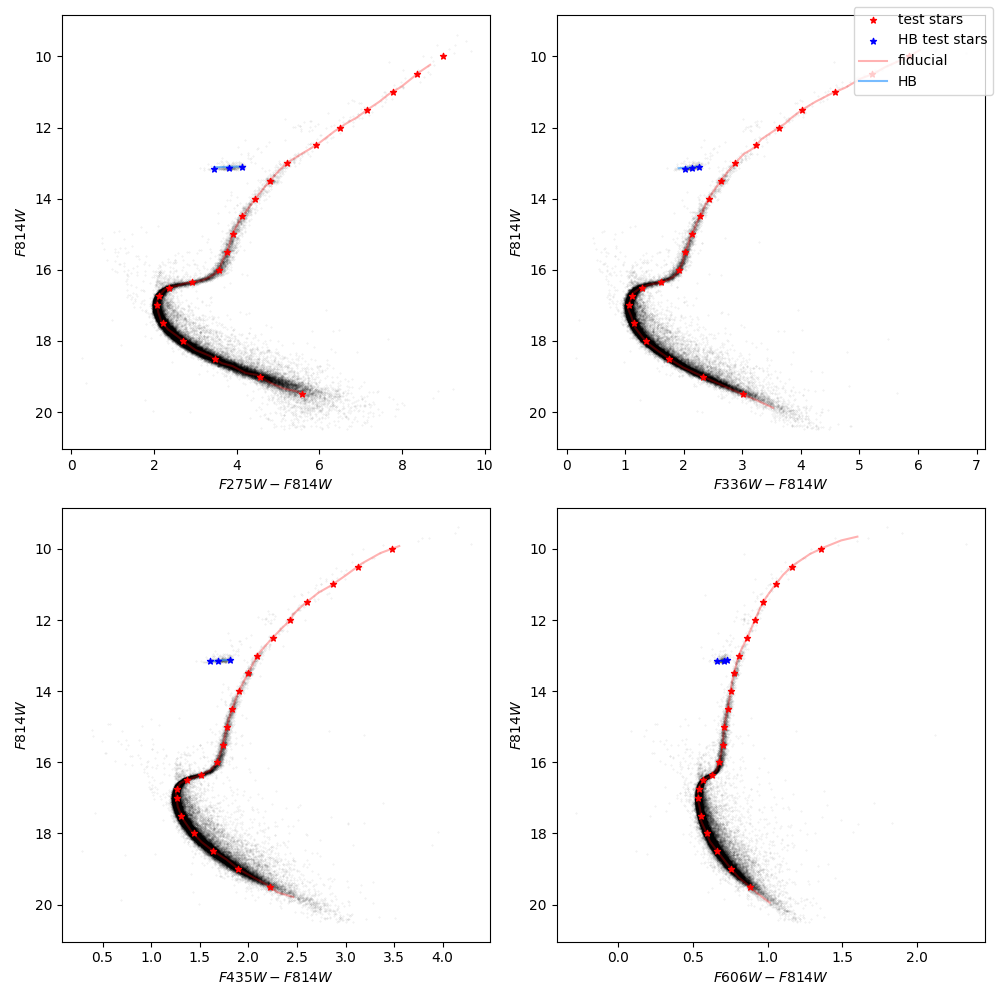

In [ ]:
# subplots for all the filters
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(data['F275W']-data['F814W'], data['F814W'], s=0.1, c='black', alpha=0.1, zorder=1)
axs[0, 0].scatter(test_stars['F275W']-test_stars['F814W'], test_stars['F814W'], s=20, c='red', label='test stars', marker='*', zorder=3)
axs[0, 0].scatter(hb_test_stars['F275W']-hb_test_stars['F814W'], hb_test_stars['F814W'], s=20, c='blue', label='HB test stars', marker='*', zorder=3)
axs[0, 0].plot(fid_275['x'], fid_275['y'], linewidth=1.5, c='red', alpha=0.3, label='fiducial', zorder=2)
axs[0, 0].plot(hb_275['x'], hb_275['y'], linewidth=1.5, c='dodgerblue', alpha=0.6, label='HB', zorder=2)
axs[0, 0].set_xlabel(r'$F275W-F814W$')
axs[0, 0].set_ylabel(r'$F814W$')
axs[0, 0].invert_yaxis()

axs[0, 1].scatter(data['F336W']-data['F814W'], data['F814W'], s=0.1, c='black', alpha=0.1, zorder=1)
axs[0, 1].scatter(test_stars['F336W']-test_stars['F814W'], test_stars['F814W'], s=20, c='red', marker='*', zorder=3)
axs[0, 1].scatter(hb_test_stars['F336W']-hb_test_stars['F814W'], hb_test_stars['F814W'], s=20, c='blue', marker='*', zorder=3)
axs[0, 1].plot(fid_336['x'], fid_336['y'], linewidth=1.5, c='red', alpha=0.3, label='fiducial', zorder=2)
axs[0, 1].plot(hb_336['x'], hb_336['y'], linewidth=1.5, c='dodgerblue', alpha=0.6, label='HB', zorder=2)
axs[0, 1].set_xlabel(r'$F336W-F814W$')
axs[0, 1].set_ylabel(r'$F814W$')
axs[0, 1].invert_yaxis()

axs[1, 0].scatter(data['F435W']-data['F814W'], data['F814W'], s=0.1, c='black', alpha=0.1, zorder=1)
axs[1, 0].scatter(test_stars['F435W']-test_stars['F814W'], test_stars['F814W'], s=20, c='red', marker='*', zorder=3)
axs[1, 0].scatter(hb_test_stars['F435W']-hb_test_stars['F814W'], hb_test_stars['F814W'], s=20, c='blue', marker='*', zorder=3)
axs[1, 0].plot(fid_435['x'], fid_435['y'], linewidth=1.5, c='red', alpha=0.3, label='fiducial', zorder=2)
axs[1, 0].plot(hb_435['x'], hb_435['y'], linewidth=1.5, c='dodgerblue', alpha=0.6, label='HB', zorder=2)
axs[1, 0].set_xlabel(r'$F435W-F814W$')
axs[1, 0].set_ylabel(r'$F814W$')
axs[1, 0].invert_yaxis()

axs[1, 1].scatter(data['F606W']-data['F814W'], data['F814W'], s=0.1, c='black', alpha=0.1, zorder=1)
axs[1, 1].scatter(test_stars['F606W']-test_stars['F814W'], test_stars['F814W'], s=20, c='red', marker='*', zorder=3)
axs[1, 1].scatter(hb_test_stars['F606W']-hb_test_stars['F814W'], hb_test_stars['F814W'], s=20, c='blue', marker='*', zorder=3)
axs[1, 1].plot(fid_606['x'], fid_606['y'], linewidth=1.5, c='red', alpha=0.3, label='fiducial', zorder=2)
axs[1, 1].plot(hb_606['x'], hb_606['y'], linewidth=1.5, c='dodgerblue', alpha=0.6, label='HB', zorder=2)
axs[1, 1].set_xlabel(r'$F606W-F814W$')
axs[1, 1].set_ylabel(r'$F814W$')
axs[1, 1].invert_yaxis()

# create a single legend for the entire figure
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels)

plt.tight_layout()
plt.show()